# Cats and Dogs from [CIFAR10](https://keras.io/datasets/)!

In [7]:
# numpy and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# keras
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

# getting the datset
from keras.datasets import cifar10
from keras import backend as K

** Load Cats and Dogs From CIFAR10 dataset **

First we load the CIFAR10 data and extract all cats and dogs from it.

x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples
channels_last


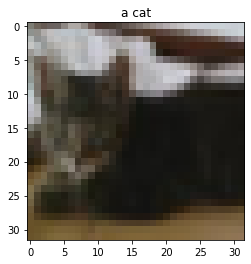

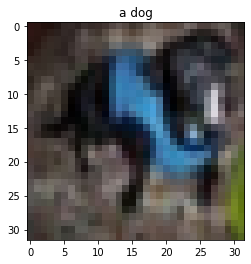

In [8]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Reduce to cats and dogs
def extract(x,y,labels):
    arg_train = []
    new_y = np.zeros(np.max(labels)+1)
    for i,l in enumerate(labels):
        arg_train.append(np.argwhere(y == l)[:,0])
        new_y[l] = i
    arg_train = np.concatenate(arg_train)
    return x[arg_train], new_y[y[arg_train]]
    
x_train, y_train = extract(x_train, y_train, [3,5])
x_test, y_test = extract(x_test, y_test, [3,5])

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# maximum value normalization
x_train /= 255
x_test /= 255

img_rows, img_cols, channels = x_train.shape[1:]

print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

plt.imshow(x_train[np.argmax(y_train==0)])
plt.title("a cat")
plt.show()
plt.imshow(x_train[np.argmax(y_train==1)])
plt.title("a dog")
plt.show()

Next, we just define a function which will display the results later.

In [9]:
def predict(idx, model, data, avg=None, norm=None, cols=5, threshold=.3):
    try:
        idx = list(idx)
    except:
        idx = [idx]
        
    cats = 0
    dogs = 0
    data = data[idx]
    if norm is None:
        p = model.predict(data)
    else:
        p = model.predict(data/norm)
    i = 0
    while i < p.shape[0]:
        fig, axs = plt.subplots(1,cols,figsize=(5*cols,5))
        fig.figsize=(20,10)
        for ax in axs:
            if avg is not None:
                img = (data[i]+avg)
            else:
                img = (data[i])

            ax.imshow(img)
            if p[i] < threshold:
                label = "cat"
                cats += 1
            elif p[i] > 1-threshold:
                label = "dog"
                dogs += 1
            else:
                label = "not sure"
            ax.text(.5,0, label+ "; score = " + str(p[i]),
                    horizontalalignment='center', verticalalignment='bottom', transform=ax.axes.transAxes,
                    backgroundcolor="white", size="large")
            i += 1
            if i >= p.shape[0]:
                break
        plt.show()
    print(cats, " cats (", cats/len(idx)*100., "%),", dogs, " dogs (", dogs/len(idx)*100., "%)")

In [10]:
batch_size = 128

# Convolutional Neural Network

A very simple CNN... (> 70% validation accuray after 10 epochs)

In [11]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.adam(lr=0.001) #keras.optimizers.Adadelta()

model1.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

# model.summary()

We will train for ten epochs (iterations ofer the whole training data)...

In [12]:
model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 236us/step - loss: 0.6900 - acc: 0.5503 - val_loss: 0.6602 - val_acc: 0.6120
Epoch 2/10
10000/10000 [==============================] - 1s 66us/step - loss: 0.6334 - acc: 0.6456 - val_loss: 0.6315 - val_acc: 0.6525
Epoch 3/10
10000/10000 [==============================] - 1s 64us/step - loss: 0.5830 - acc: 0.6947 - val_loss: 0.5939 - val_acc: 0.6705
Epoch 4/10
10000/10000 [==============================] - 1s 63us/step - loss: 0.5394 - acc: 0.7277 - val_loss: 0.5757 - val_acc: 0.6850
Epoch 5/10
10000/10000 [==============================] - 1s 65us/step - loss: 0.5022 - acc: 0.7539 - val_loss: 0.5201 - val_acc: 0.7325
Epoch 6/10
10000/10000 [==============================] - 1s 64us/step - loss: 0.4616 - acc: 0.7772 - val_loss: 0.5497 - val_acc: 0.7375
Epoch 7/10
10000/10000 [==============================] - 1s 64us/step - loss: 0.4129 - acc: 0.8051 - val_loss: 0.5465 - val_acc

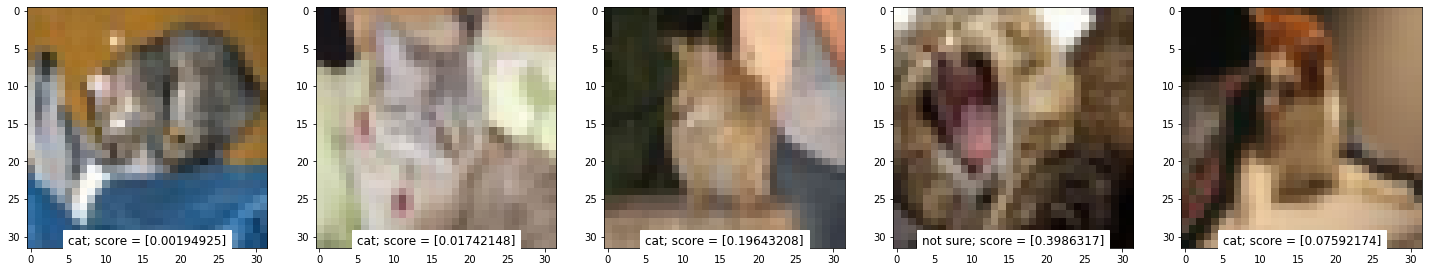

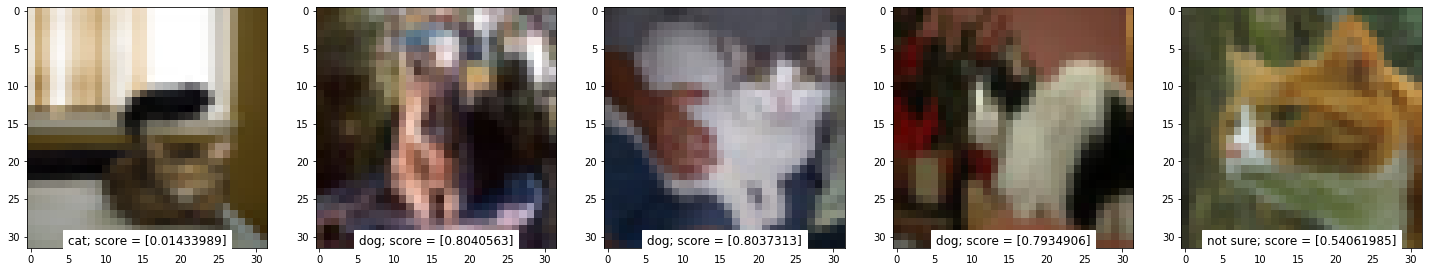

5  cats ( 50.0 %), 3  dogs ( 30.0 %)


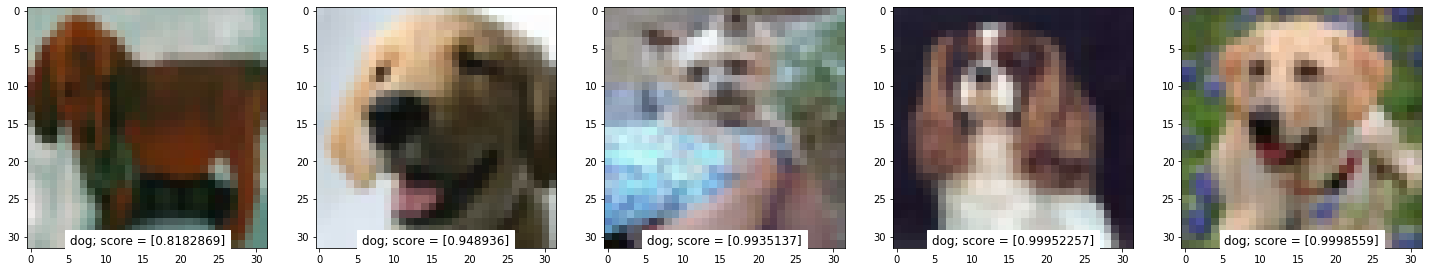

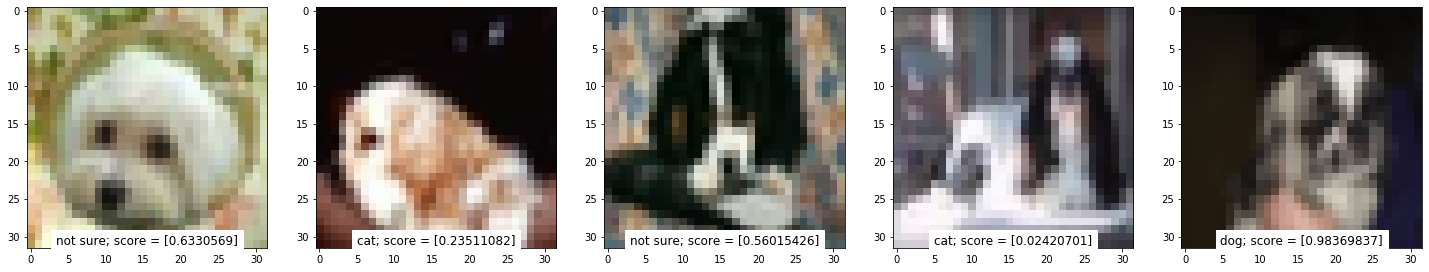

2  cats ( 20.0 %), 6  dogs ( 60.0 %)


In [13]:
predict(range(10), model1, x_test)
predict(range(x_test.shape[0]-10, x_test.shape[0]), model1, x_test)

A rather simple CNN: Deeper than the one above, but actually with fewer trainable parameters. It gives slightly better performance.

In [14]:
model2 = Sequential()
model2.add(Conv2D(48, kernel_size=(5, 5), padding="same",
                 activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, (5, 5), activation='relu', padding="same"))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(96, (5, 5), activation='relu', padding="same"))
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(160, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model2.add(Flatten())
model2.add(Dropout(.3))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

opt = keras.optimizers.adam(lr=0.001)

model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# model.summary()

W1009 14:44:25.153165 35184372383184 deprecation_wrapper.py:119] From /software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [15]:
model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 320us/step - loss: 0.7187 - acc: 0.5556 - val_loss: 0.7417 - val_acc: 0.4835
Epoch 2/10
10000/10000 [==============================] - 1s 137us/step - loss: 0.6668 - acc: 0.5962 - val_loss: 0.6929 - val_acc: 0.5240
Epoch 3/10
10000/10000 [==============================] - 1s 135us/step - loss: 0.6344 - acc: 0.6360 - val_loss: 0.8884 - val_acc: 0.5080
Epoch 4/10
10000/10000 [==============================] - 1s 140us/step - loss: 0.5974 - acc: 0.6706 - val_loss: 0.7703 - val_acc: 0.5025
Epoch 5/10
10000/10000 [==============================] - 1s 140us/step - loss: 0.5445 - acc: 0.7217 - val_loss: 0.5435 - val_acc: 0.7070
Epoch 6/10
10000/10000 [==============================] - 1s 139us/step - loss: 0.5126 - acc: 0.7373 - val_loss: 0.8491 - val_acc: 0.5765
Epoch 7/10
10000/10000 [==============================] - 1s 137us/step - loss: 0.4747 - acc: 0.7725 - val_loss: 0.6329 - v

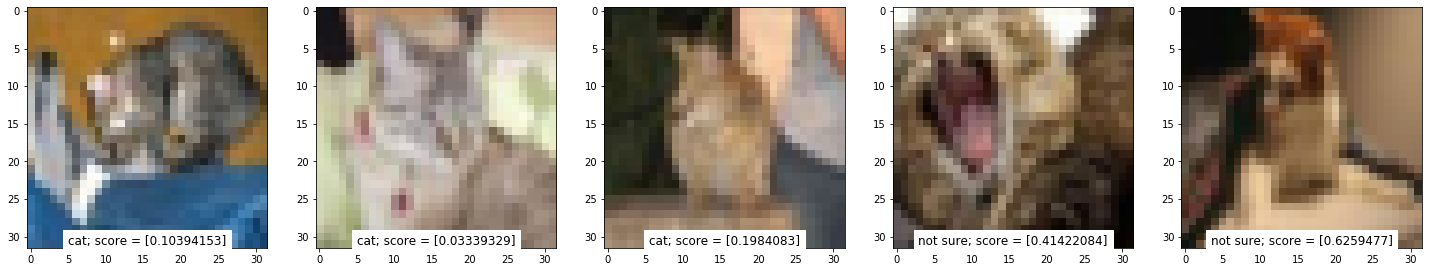

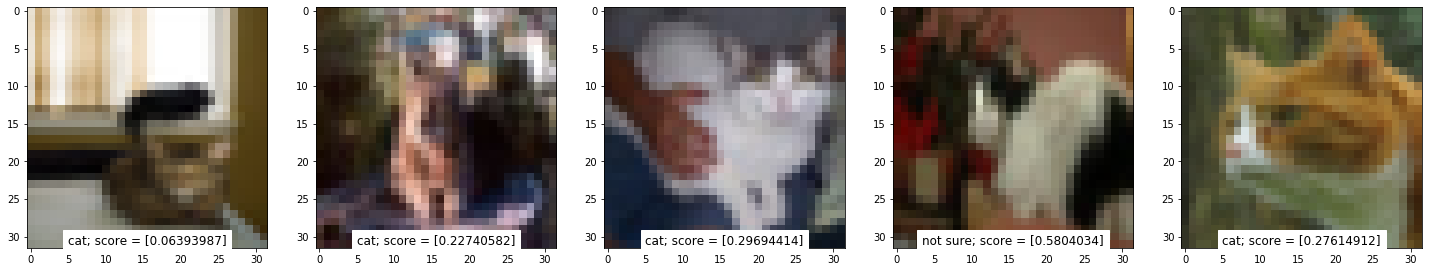

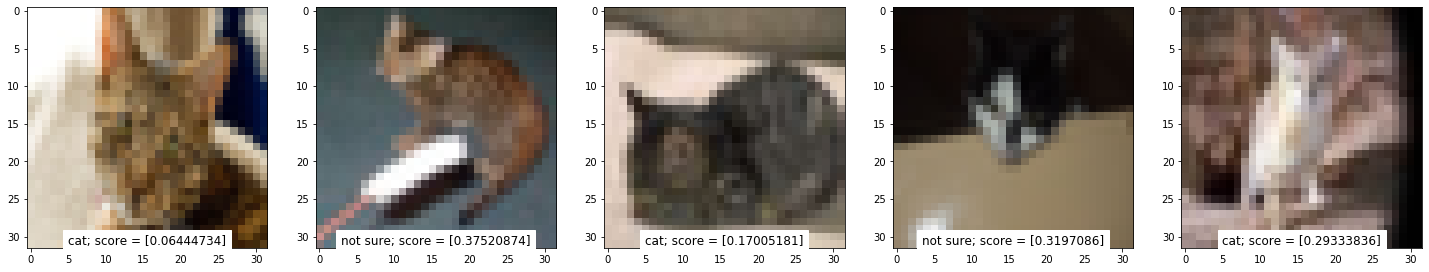

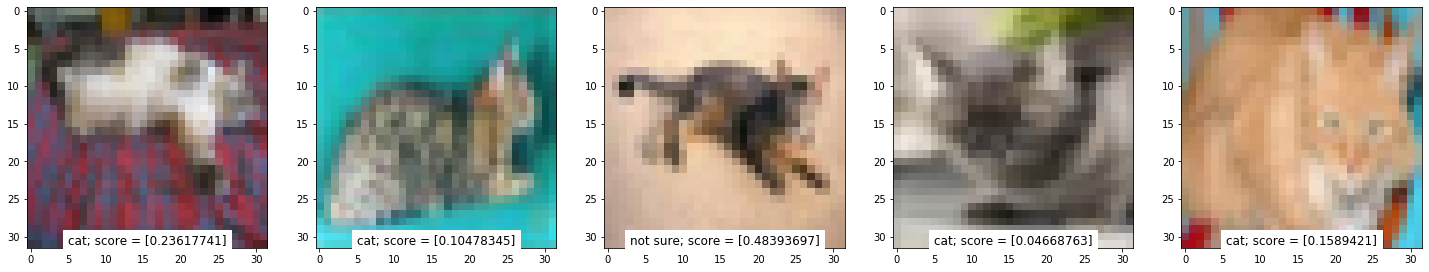

14  cats ( 70.0 %), 0  dogs ( 0.0 %)


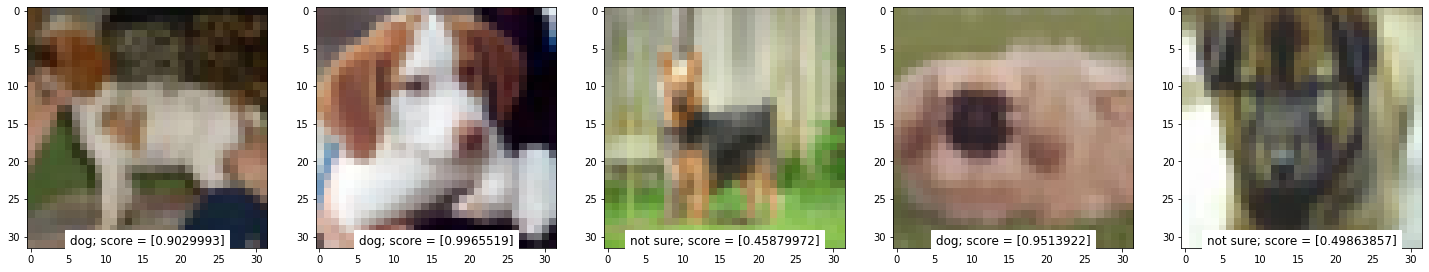

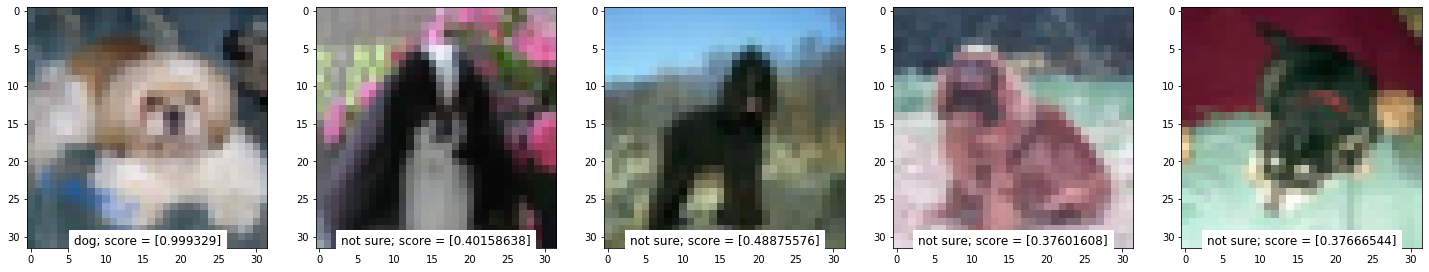

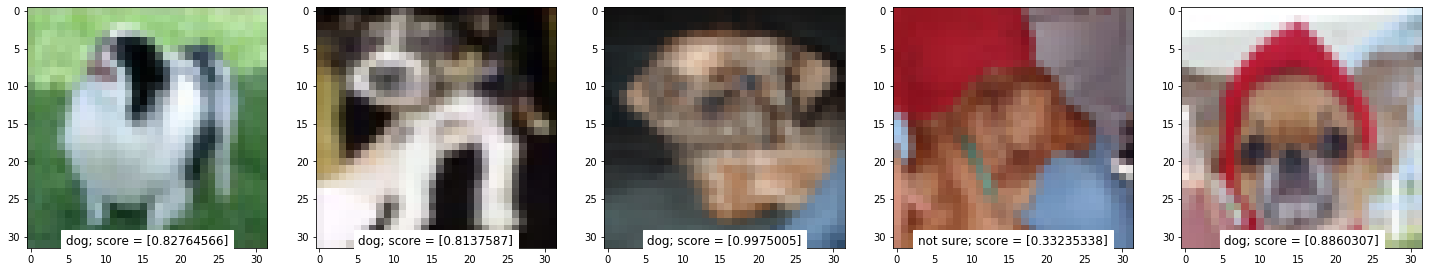

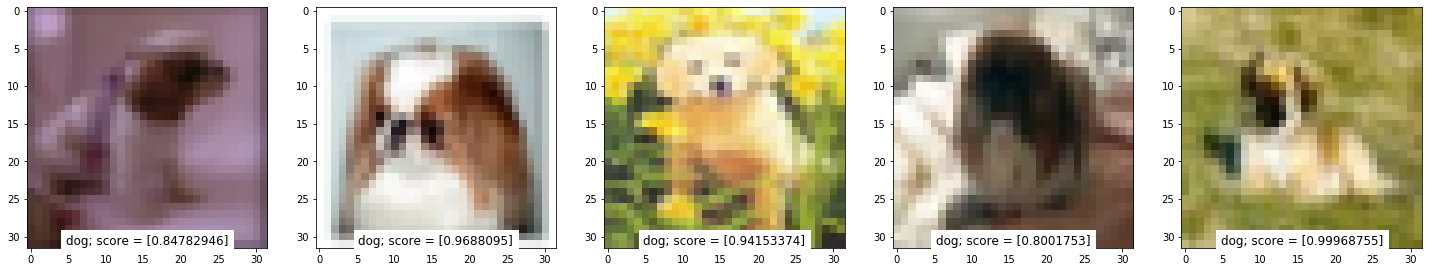

0  cats ( 0.0 %), 13  dogs ( 65.0 %)


In [16]:
predict(range(20), model2, x_test)
predict(range(x_test.shape[0]//2, x_test.shape[0]//2+20), model2, x_test)

## Data Augmentation

Looking at the training progress we can see, that in the end the loss decreases but the validation loss does not. The network is only optimized for the training data. The test data is used to validate the performance on unseen images. What we observe here is called overfitting. This problem will be adressed in depth in the session on regularization.

One simple explanation for the phenomenon in our case is, that we have limited training data over which we interate over and over and many parameters in our network which can *memorize* the data. One way to get more data is augmenting the available data with randomly transformed data which stil retains the same labels.

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# traning data is augmented
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow(x_train, y_train,
    batch_size=batch_size)

With the augmented training data we can continue training and improve the results on the test set.

In [18]:
model2.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=(x_test, y_test))

Epoch 1/50
15/15 [==============================] - 1s 64ms/step - loss: 0.4485 - acc: 0.7870 - val_loss: 0.5360 - val_acc: 0.7395
Epoch 2/50
15/15 [==============================] - 1s 60ms/step - loss: 0.4483 - acc: 0.7922 - val_loss: 0.4782 - val_acc: 0.7675
Epoch 3/50
15/15 [==============================] - 1s 62ms/step - loss: 0.4289 - acc: 0.8026 - val_loss: 0.4909 - val_acc: 0.7545
Epoch 4/50
15/15 [==============================] - 1s 59ms/step - loss: 0.4374 - acc: 0.7943 - val_loss: 0.4681 - val_acc: 0.7720
Epoch 5/50
15/15 [==============================] - 1s 60ms/step - loss: 0.4419 - acc: 0.8021 - val_loss: 0.5743 - val_acc: 0.7240
Epoch 6/50
15/15 [==============================] - 1s 60ms/step - loss: 0.4079 - acc: 0.8172 - val_loss: 0.5660 - val_acc: 0.7285
Epoch 7/50
15/15 [==============================] - 1s 64ms/step - loss: 0.4537 - acc: 0.7745 - val_loss: 0.5479 - val_acc: 0.7020
Epoch 8/50
15/15 [==============================] - 1s 58ms/step - loss: 0.4240 - a

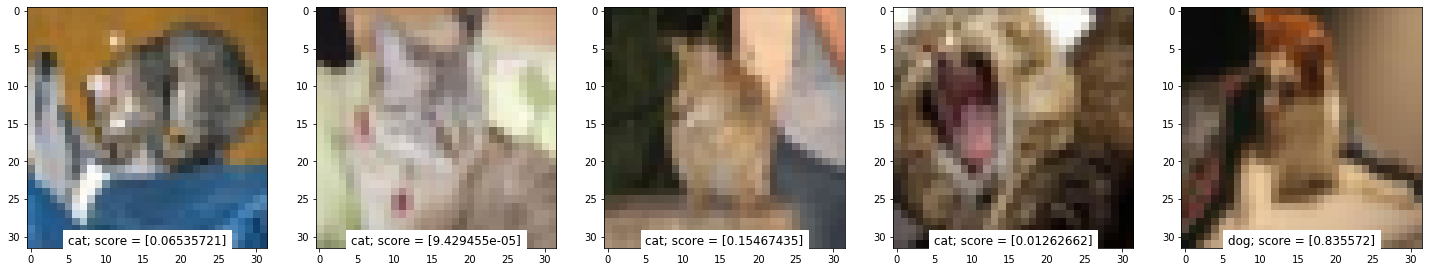

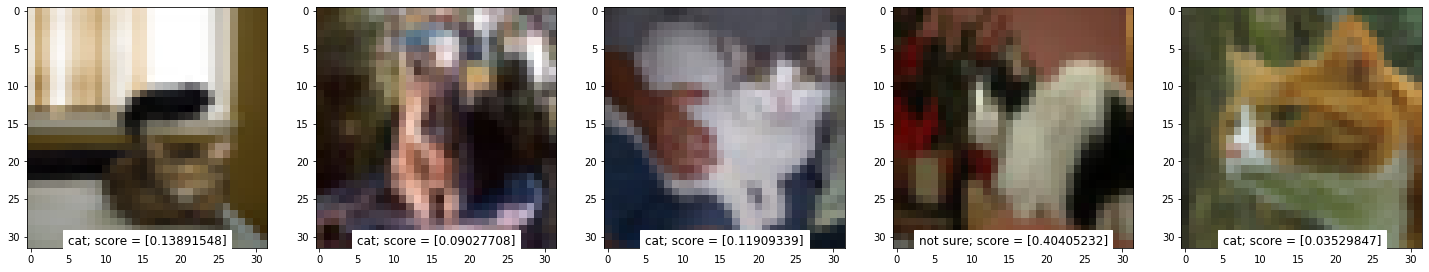

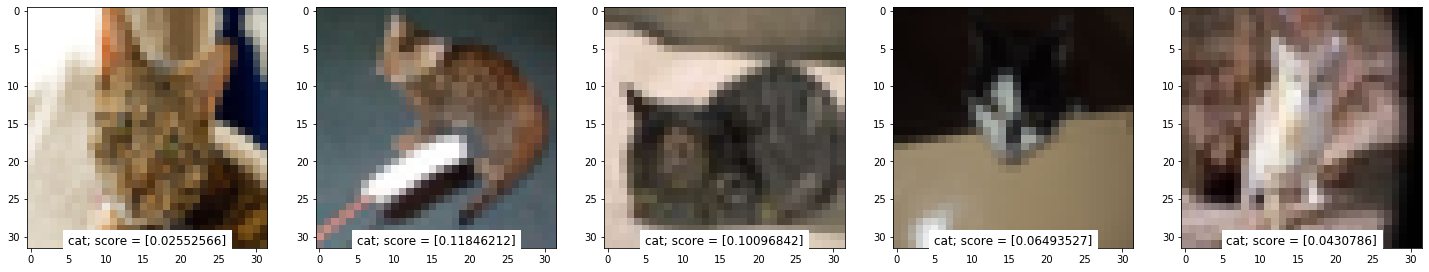

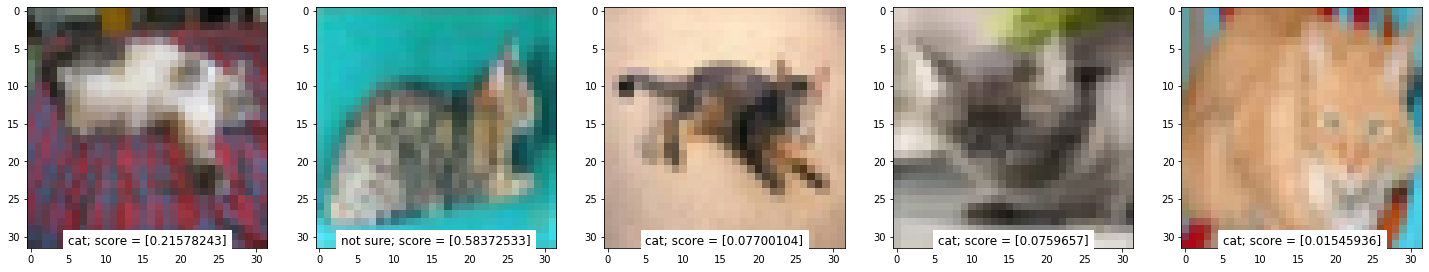

17  cats ( 85.0 %), 1  dogs ( 5.0 %)


In [19]:
predict(range(20), model2, x_test)


### PLEASE RUN THIS COMMAND IF YOU FINISHED THE NOTEBOOK

In [ ]:
import os
temp=os.getpid()
!kill -9 $temp